# Text Classification Modeling and Pre Processing
* Notebook by Adam Lang
* Date: 5/14/2024


# NLP Text Classification Models - Overview
* There are primarily 2 types or classes of text classification models
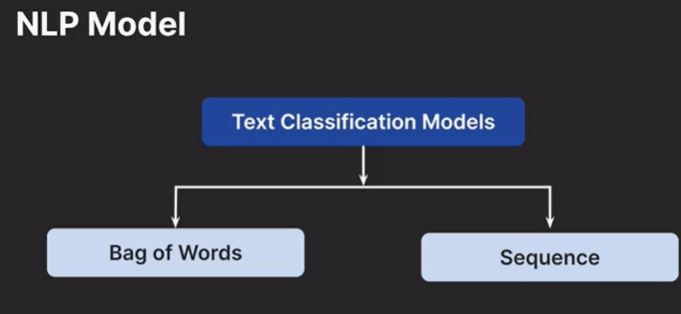

## Bag of Words Models
* Sentences or documents are represented as a "bag of its wordset".
* Bag of Words models ignore **grammar** and **sequence**
* A bag of words is analagous to scattering blocks of scrabble tiles
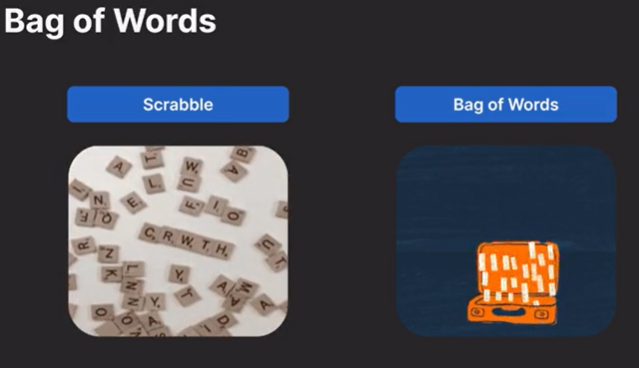

* Each word in the "bag" is a **token**.
* **Tokenization** is the process of deserialization or breaking down the sentences, paragraphs, articles and documents into smaller chunks for natural language processing.
* Type of tokenization
    * Sentence level
    * Character level
    * Word level -- **most common**

## Text Pre-processing for bag of words
* Tokenization is the most common technique used but there are other very important pre-processing techniques to always consider:
    * lowercasing
    * removal of punctuation
    * removal of special characters
    * stop words removal
    * stemming and lemmatization
    * vocabulary building
    * vectorization

* We will demonstrate these techniques using Python

# Basic Pre-processing techniques

In [43]:
!pip install nltk

In [44]:
# imports
import nltk
import pandas as pd

In [45]:
# nltk downloads for processing
nltk.download('punkt') # tokenizer models
nltk.download('wordnet') # wordent required for semantic analysis for lemmatization tasks
nltk.download('stopwords') # stop word management
# nltk.download('averaged_perceptron_tagger') # POS tagger in nltk - spacy has one too
nltk.download('omw-1.4') # download WordNet OMW corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Text Sources
* We will use text from the MTSamples website which is an open-source site of deidentified medical notes. Source: https://mtsamples.com/site/pages/browse.asp?type=6-Cardiovascular%20/%20Pulmonary
* We will use 3 different Cardiology notes that discuss Atrial Fibrillation.
  * 1. Atrial Fibrillation - consult
  * 2. Atrial Fibrillation - SOAP
  * 3. Atrial Fibrillation - management

#### Document 1 - Atrial Fibrillation consult




In [46]:
# input text
doc1 = """PAST MEDICAL HISTORY: Includes, end-stage renal disease from hypertension. She follows up with Dr. X in her office and has been known to have a small-to-moderate sized pericardial effusion since 11/07 that has apparently been followed and it appears that the patient was not interested in having diagnostic pericardiocentesis done. She had an echocardiogram today (please see also that report), which shows stable and small-to-moderate sized pericardial effusion without tamponade, normal left ventricular ejection fraction at 55% with mild concentric left ventricular hypertrophy, mildly dilated right ventricular size, normal right ventricular ejection fraction, moderate mitral regurgitation and severe tricuspid regurgitation with severe pulmonary hypertension, estimated PA systolic pressure of 71 mmHg when compared to the prior echocardiogram done 08/29/07, previously the mitral regurgitation was mild and previously the PA systolic pressure was estimated at 90 mmHg. Other findings were not significantly changed including pericardial effusion description. She has a history of longstanding hypertension. She has been on hemodialysis since 1997 for renal failure, history of mini-strokes documented several years ago, history of seizure disorder, she has a history of right upper extremity edema and right breast enlargement from right subclavian vein occlusion. She has a history of hypertension, depression, hyperlipidemia, on Sensipar for tertiary hyperparathyroidism."""

#### Document 2 - Atrial Fibrillation SOAP

In [47]:
# input text 2
doc2 = """SUBJECTIVE: The patient states that she feels better. She is on IV amiodarone, the dosage pattern is appropriate for ventricular tachycardia. Researching the available records, I find only an EMS verbal statement that tachycardia of wide complex was seen. There is no strip for me to review all available EKG tracings show a narrow complex atrial fibrillation pattern that is now converted to sinus rhythm.

The patient states that for a week, she has been home postoperative from aortic valve replacement on 12/01/08 at ABC Medical Center. The aortic stenosis was secondary to a congenital bicuspid valve, by her description. She states that her shortness of breath with exertion has been stable, but has yet to improve from its preoperative condition. She has not had any decline in her postoperative period of her tolerance to exertion.

The patient had noted intermittent bursts of fast heart rate at home that had been increasing over the last several days. Last night, she had a prolonged episode for which she contacted EMS. Her medications at home had been uninterrupted and without change from those listed, being Toprol-XL 100 mg q.a.m., Dyazide 25/37.5 mg, Nexium 40 mg, all taken once a day. She has been maintaining her Crestor and Zetia at 20 and 10 mg respectively. She states that she has been taking her aspirin at 325 mg q.a.m. She remains on Zyrtec 10 mg q.a.m. Her only allergy is listed to latex."""

#### Document 3 - Atrial Fibrillation management

In [48]:
## input text3
doc3 = """HISTORY OF PRESENT ILLNESS: The patient is a very pleasant 62-year-old African American female with a history of hypertension, hypercholesterolemia, and CVA, referred by Dr. X for evaluation and management of atrial fibrillation. The patient states that on Monday during routine Holt exam, it was detected by Dr. X that her heart was irregular on exam. EKG obtained after that revealed atrial fibrillation, and subsequently the patient was started on Coumadin as well as having Toprol and referred for evaluation. The patient states that for the last 3 years, she has had episodes of her heart racing. It may last for minutes up to most 1 hour, and it will occasionally be related to eating a heavy meal or her caffeine or chocolate intake. Denies dyspnea, diaphoresis, presyncope or syncope with the events, and she has had no episodes of chest pain. They subsequently resolve on their own and do not limit her in anyway. However, she states that for the last several years may be up to 7 years that she can recollect that she has been fatigued, and over the past couple of years, her symptoms have become more severe. She said she can walk no more than 25 feet without becoming tired. She states that she has to rest then her symptoms will go away, but she has been limited from that standpoint. Denies peripheral edema, PND, orthopnea, abdominal pain, swelling, recent fever or chills. She actually today has no complaints, and states that she has been compliant with her medications and has started taking her Coumadin as directed."""

# Tokenization
* First we will use nltk for this

In [49]:
## create corpus
corpus = [doc1,doc2,doc3]

In [50]:
## using nltk
from nltk.tokenize import word_tokenize
tokenized_docs = []
for doc in corpus:
  tokens = word_tokenize(doc)
  tokenized_docs.append(tokens)



# print all the tokens for all docs and token lengths for each doc
print("\nTokenized Documents")
for i, doc in enumerate(tokenized_docs):
  print(f"Document {i+1} Tokens:", doc[:], "...(Total:", len(doc), ")")
  print() # new line


Tokenized Documents
Document 1 Tokens: ['PAST', 'MEDICAL', 'HISTORY', ':', 'Includes', ',', 'end-stage', 'renal', 'disease', 'from', 'hypertension', '.', 'She', 'follows', 'up', 'with', 'Dr.', 'X', 'in', 'her', 'office', 'and', 'has', 'been', 'known', 'to', 'have', 'a', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'since', '11/07', 'that', 'has', 'apparently', 'been', 'followed', 'and', 'it', 'appears', 'that', 'the', 'patient', 'was', 'not', 'interested', 'in', 'having', 'diagnostic', 'pericardiocentesis', 'done', '.', 'She', 'had', 'an', 'echocardiogram', 'today', '(', 'please', 'see', 'also', 'that', 'report', ')', ',', 'which', 'shows', 'stable', 'and', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'without', 'tamponade', ',', 'normal', 'left', 'ventricular', 'ejection', 'fraction', 'at', '55', '%', 'with', 'mild', 'concentric', 'left', 'ventricular', 'hypertrophy', ',', 'mildly', 'dilated', 'right', 'ventricular', 'size', ',', 'normal', 'right', 'ventricula

### Spacy tokenizer

In [51]:
import spacy
nlp = spacy.load("en_core_web_sm")

# create doc object
doc = nlp(doc1)


In [52]:
# tokenize doc1
print([token for token in doc])

[PAST, MEDICAL, HISTORY, :, Includes, ,, end, -, stage, renal, disease, from, hypertension, ., She, follows, up, with, Dr., X, in, her, office, and, has, been, known, to, have, a, small, -, to, -, moderate, sized, pericardial, effusion, since, 11/07, that, has, apparently, been, followed, and, it, appears, that, the, patient, was, not, interested, in, having, diagnostic, pericardiocentesis, done, ., She, had, an, echocardiogram, today, (, please, see, also, that, report, ), ,, which, shows, stable, and, small, -, to, -, moderate, sized, pericardial, effusion, without, tamponade, ,, normal, left, ventricular, ejection, fraction, at, 55, %, with, mild, concentric, left, ventricular, hypertrophy, ,, mildly, dilated, right, ventricular, size, ,, normal, right, ventricular, ejection, fraction, ,, moderate, mitral, regurgitation, and, severe, tricuspid, regurgitation, with, severe, pulmonary, hypertension, ,, estimated, PA, systolic, pressure, of, 71, mmHg, when, compared, to, the, prior, ec

In [53]:
## tokens as strings in spacy
print([token.text for token in doc])

['PAST', 'MEDICAL', 'HISTORY', ':', 'Includes', ',', 'end', '-', 'stage', 'renal', 'disease', 'from', 'hypertension', '.', 'She', 'follows', 'up', 'with', 'Dr.', 'X', 'in', 'her', 'office', 'and', 'has', 'been', 'known', 'to', 'have', 'a', 'small', '-', 'to', '-', 'moderate', 'sized', 'pericardial', 'effusion', 'since', '11/07', 'that', 'has', 'apparently', 'been', 'followed', 'and', 'it', 'appears', 'that', 'the', 'patient', 'was', 'not', 'interested', 'in', 'having', 'diagnostic', 'pericardiocentesis', 'done', '.', 'She', 'had', 'an', 'echocardiogram', 'today', '(', 'please', 'see', 'also', 'that', 'report', ')', ',', 'which', 'shows', 'stable', 'and', 'small', '-', 'to', '-', 'moderate', 'sized', 'pericardial', 'effusion', 'without', 'tamponade', ',', 'normal', 'left', 'ventricular', 'ejection', 'fraction', 'at', '55', '%', 'with', 'mild', 'concentric', 'left', 'ventricular', 'hypertrophy', ',', 'mildly', 'dilated', 'right', 'ventricular', 'size', ',', 'normal', 'right', 'ventricula

## PyTorch Tokenizer
* Torchtext tokenizers demonstration
1. `get_tokenizer()` - splits on whitespace

In [54]:
# get_tokenizer
from torchtext.data.utils import get_tokenizer

# instantiate the tokenizer
tokenizer = get_tokenizer("basic_english")
tokens = [tokenizer(x) for x in corpus]
print(tokens)

[['past', 'medical', 'history', 'includes', ',', 'end-stage', 'renal', 'disease', 'from', 'hypertension', '.', 'she', 'follows', 'up', 'with', 'dr', '.', 'x', 'in', 'her', 'office', 'and', 'has', 'been', 'known', 'to', 'have', 'a', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'since', '11/07', 'that', 'has', 'apparently', 'been', 'followed', 'and', 'it', 'appears', 'that', 'the', 'patient', 'was', 'not', 'interested', 'in', 'having', 'diagnostic', 'pericardiocentesis', 'done', '.', 'she', 'had', 'an', 'echocardiogram', 'today', '(', 'please', 'see', 'also', 'that', 'report', ')', ',', 'which', 'shows', 'stable', 'and', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'without', 'tamponade', ',', 'normal', 'left', 'ventricular', 'ejection', 'fraction', 'at', '55%', 'with', 'mild', 'concentric', 'left', 'ventricular', 'hypertrophy', ',', 'mildly', 'dilated', 'right', 'ventricular', 'size', ',', 'normal', 'right', 'ventricular', 'ejection', 'fraction', ',', 'moderate',

2. `BERTTokenizer`
* Based on wordpiece tokenizer
* The great thing about BERT Tokenizer is that it can tokenize and lower_case at the same time as we see below.

In [55]:
from torchtext.transforms import BERTTokenizer
VOCAB_FILE = "https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt"
tokenizer = BERTTokenizer(vocab_path=VOCAB_FILE, do_lower_case=True, return_tokens=True)

for i in corpus:
  print(tokenizer(i))

100%|██████████| 232k/232k [00:00<00:00, 4.60MB/s]


['past', 'medical', 'history', ':', 'includes', ',', 'end', '-', 'stage', 'renal', 'disease', 'from', 'hyper', '##tension', '.', 'she', 'follows', 'up', 'with', 'dr', '.', 'x', 'in', 'her', 'office', 'and', 'has', 'been', 'known', 'to', 'have', 'a', 'small', '-', 'to', '-', 'moderate', 'sized', 'per', '##ica', '##rdial', 'e', '##ff', '##usion', 'since', '11', '/', '07', 'that', 'has', 'apparently', 'been', 'followed', 'and', 'it', 'appears', 'that', 'the', 'patient', 'was', 'not', 'interested', 'in', 'having', 'diagnostic', 'per', '##ica', '##rdi', '##oc', '##entes', '##is', 'done', '.', 'she', 'had', 'an', 'echo', '##card', '##io', '##gram', 'today', '(', 'please', 'see', 'also', 'that', 'report', ')', ',', 'which', 'shows', 'stable', 'and', 'small', '-', 'to', '-', 'moderate', 'sized', 'per', '##ica', '##rdial', 'e', '##ff', '##usion', 'without', 'tam', '##pon', '##ade', ',', 'normal', 'left', 'vent', '##ric', '##ular', 'e', '##ject', '##ion', 'fraction', 'at', '55', '%', 'with', 'mi

# Lowercasing
* Reduces size of input data/vocabulary
* Makes data consistent or normalized for modeling and analysis.

In [56]:
## coverting tokens to lowercase

## create a list to append transformed tokens
lowercased_docs = []
for tokens in tokenized_docs:
  lowercased_tokens = [token.lower() for token in tokens]
  lowercased_docs.append(lowercased_tokens)

## print tokenized and lowercased documents
print("\nTokenized and lowercased documents:")
for i, doc in enumerate(lowercased_docs):
  print(f"Document {i+1} Tokens:", doc, "...(Total:)", len(doc), ")\n")


Tokenized and lowercased documents:
Document 1 Tokens: ['past', 'medical', 'history', ':', 'includes', ',', 'end-stage', 'renal', 'disease', 'from', 'hypertension', '.', 'she', 'follows', 'up', 'with', 'dr.', 'x', 'in', 'her', 'office', 'and', 'has', 'been', 'known', 'to', 'have', 'a', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'since', '11/07', 'that', 'has', 'apparently', 'been', 'followed', 'and', 'it', 'appears', 'that', 'the', 'patient', 'was', 'not', 'interested', 'in', 'having', 'diagnostic', 'pericardiocentesis', 'done', '.', 'she', 'had', 'an', 'echocardiogram', 'today', '(', 'please', 'see', 'also', 'that', 'report', ')', ',', 'which', 'shows', 'stable', 'and', 'small-to-moderate', 'sized', 'pericardial', 'effusion', 'without', 'tamponade', ',', 'normal', 'left', 'ventricular', 'ejection', 'fraction', 'at', '55', '%', 'with', 'mild', 'concentric', 'left', 'ventricular', 'hypertrophy', ',', 'mildly', 'dilated', 'right', 'ventricular', 'size', ',', 'normal', 'rig

# Removing Punctuations
* Makes the text simpler for the model.

In [57]:
# import string

# Remove punctuations
## create new list
no_punctuation_docs = []
for token in lowercased_docs:
  filtered_tokens = [token for token in tokens if token.isalpha()] # remove punctations
  no_punctuation_docs.append(filtered_tokens)

# print documents without punctuation along with token counts
print("\nDocuments with Tokens Lowercased and Punctuation Removed:")
for i, doc in enumerate(no_punctuation_docs):
  print(f"Document {i+1} Tokens:", doc, "... (Total:", len(doc), ")\n")


Documents with Tokens Lowercased and Punctuation Removed:
Document 1 Tokens: ['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'The', 'patient', 'is', 'a', 'very', 'pleasant', 'African', 'American', 'female', 'with', 'a', 'history', 'of', 'hypertension', 'hypercholesterolemia', 'and', 'CVA', 'referred', 'by', 'X', 'for', 'evaluation', 'and', 'management', 'of', 'atrial', 'fibrillation', 'The', 'patient', 'states', 'that', 'on', 'Monday', 'during', 'routine', 'Holt', 'exam', 'it', 'was', 'detected', 'by', 'X', 'that', 'her', 'heart', 'was', 'irregular', 'on', 'exam', 'EKG', 'obtained', 'after', 'that', 'revealed', 'atrial', 'fibrillation', 'and', 'subsequently', 'the', 'patient', 'was', 'started', 'on', 'Coumadin', 'as', 'well', 'as', 'having', 'Toprol', 'and', 'referred', 'for', 'evaluation', 'The', 'patient', 'states', 'that', 'for', 'the', 'last', 'years', 'she', 'has', 'had', 'episodes', 'of', 'her', 'heart', 'racing', 'It', 'may', 'last', 'for', 'minutes', 'up', 'to', 'most', 'hour', 'and',

# Stopwords Removal

In [58]:
## nltk stop words removal
from nltk.corpus import stopwords
## get the english stopwords
stop_words = set(stopwords.words("english"))

# remove stopwords
no_stopwords_docs = []
for tokens in no_punctuation_docs:
  filtered_tokens = [token for token in tokens if token not in stop_words]
  no_stopwords_docs.append(filtered_tokens)

# Print documents without stopwords along with their token counts
print("\nDocuments with Tokens lowercased, Punctuation removed and Stopwords removed:")
for i, doc in enumerate(no_stopwords_docs):
  print(f"Document {i+1} Tokens:", doc, "....(Total:)", len(doc), ")\n")


Documents with Tokens lowercased, Punctuation removed and Stopwords removed:
Document 1 Tokens: ['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'The', 'patient', 'pleasant', 'African', 'American', 'female', 'history', 'hypertension', 'hypercholesterolemia', 'CVA', 'referred', 'X', 'evaluation', 'management', 'atrial', 'fibrillation', 'The', 'patient', 'states', 'Monday', 'routine', 'Holt', 'exam', 'detected', 'X', 'heart', 'irregular', 'exam', 'EKG', 'obtained', 'revealed', 'atrial', 'fibrillation', 'subsequently', 'patient', 'started', 'Coumadin', 'well', 'Toprol', 'referred', 'evaluation', 'The', 'patient', 'states', 'last', 'years', 'episodes', 'heart', 'racing', 'It', 'may', 'last', 'minutes', 'hour', 'occasionally', 'related', 'eating', 'heavy', 'meal', 'caffeine', 'chocolate', 'intake', 'Denies', 'dyspnea', 'diaphoresis', 'presyncope', 'syncope', 'events', 'episodes', 'chest', 'pain', 'They', 'subsequently', 'resolve', 'limit', 'anyway', 'However', 'states', 'last', 'several', 'years', 

In [59]:
# add 'also' to the set of stopwords
stop_words.add('also')

# remove stopwords again, now including 'also'
no_stopwords_including_also_docs = []
for tokens in no_stopwords_docs: # we'll start from the already stopword-removed docs
    filtered_tokens = [token for token in tokens if token not in stop_words]
    no_stopwords_including_also_docs.append(filtered_tokens)

# print documents without 'also' and other stopwords, along with their token counts
print("\Documents with Tokens Lowercased, Punctuation removed, and Stopwords including 'also' Removed:")
for i, doc in enumerate(no_stopwords_including_also_docs):
  print(f"Document {i+1} Tokens:", doc, "...(Total:", len(doc), ")\n")

\Documents with Tokens Lowercased, Punctuation removed, and Stopwords including 'also' Removed:
Document 1 Tokens: ['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'The', 'patient', 'pleasant', 'African', 'American', 'female', 'history', 'hypertension', 'hypercholesterolemia', 'CVA', 'referred', 'X', 'evaluation', 'management', 'atrial', 'fibrillation', 'The', 'patient', 'states', 'Monday', 'routine', 'Holt', 'exam', 'detected', 'X', 'heart', 'irregular', 'exam', 'EKG', 'obtained', 'revealed', 'atrial', 'fibrillation', 'subsequently', 'patient', 'started', 'Coumadin', 'well', 'Toprol', 'referred', 'evaluation', 'The', 'patient', 'states', 'last', 'years', 'episodes', 'heart', 'racing', 'It', 'may', 'last', 'minutes', 'hour', 'occasionally', 'related', 'eating', 'heavy', 'meal', 'caffeine', 'chocolate', 'intake', 'Denies', 'dyspnea', 'diaphoresis', 'presyncope', 'syncope', 'events', 'episodes', 'chest', 'pain', 'They', 'subsequently', 'resolve', 'limit', 'anyway', 'However', 'states', 'last', 's

# Spacy Text Cleaning Pipeline
* Source docs: https://spacy.io/universe/project/spacy-cleaner
* pypy: https://pypi.org/project/spacy-cleaner/
* We can run a pipeline in Spacy to clean the text rather than writing so many loops or functions.



In [60]:
!pip install --upgrade spacy_cleaner

In [61]:
import spacy
import spacy_cleaner
from spacy_cleaner import processing, Cleaner

# load spacy model
model = spacy.load("en_core_web_sm")

# set up the spacy pipeline
pipeline = Cleaner(
    model,
    processing.remove_stopword_token,
    processing.replace_punctuation_token,
    processing.mutate_lemma_token,
)

# input text corpus
texts = (corpus)

# apply to cleaner pipeline
pipeline.clean(texts)

Cleaning Progress: 100%|██████████| 3/3 [00:00<00:00, 19.15it/s]


['PAST MEDICAL history _IS_PUNCT_ include _IS_PUNCT_ end _IS_PUNCT_ stage renal disease hypertension _IS_PUNCT_ follow Dr. X office know small _IS_PUNCT_ _IS_PUNCT_ moderate sized pericardial effusion 11/07 apparently follow appear patient interested have diagnostic pericardiocentesis _IS_PUNCT_ echocardiogram today _IS_PUNCT_ report _IS_PUNCT_ _IS_PUNCT_ show stable small _IS_PUNCT_ _IS_PUNCT_ moderate sized pericardial effusion tamponade _IS_PUNCT_ normal left ventricular ejection fraction 55 _IS_PUNCT_ mild concentric leave ventricular hypertrophy _IS_PUNCT_ mildly dilate right ventricular size _IS_PUNCT_ normal right ventricular ejection fraction _IS_PUNCT_ moderate mitral regurgitation severe tricuspid regurgitation severe pulmonary hypertension _IS_PUNCT_ estimate PA systolic pressure 71 mmHg compare prior echocardiogram 08/29/07 _IS_PUNCT_ previously mitral regurgitation mild previously PA systolic pressure estimate 90 mmHg _IS_PUNCT_ finding significantly change include pericar

# Stemming

In [62]:
from nltk.stem import PorterStemmer

# init Porter Stemmer
stemmer = PorterStemmer()

# apply stemming to documents
stemmed_docs = []
for tokens in no_stopwords_including_also_docs:
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  stemmed_docs.append(stemmed_tokens)


## print stemmed documents along with token counts
print("\nDocuments with Tokens Lowercased, Punctuation Removed, Stopwords Including 'also' Removed, and Stemmed:")
for i, doc in enumerate(stemmed_docs):
  print(f"Document {i+1} Tokens:", doc, ".... (Total:)", len(doc), ")\n")


Documents with Tokens Lowercased, Punctuation Removed, Stopwords Including 'also' Removed, and Stemmed:
Document 1 Tokens: ['histori', 'of', 'present', 'ill', 'the', 'patient', 'pleasant', 'african', 'american', 'femal', 'histori', 'hypertens', 'hypercholesterolemia', 'cva', 'refer', 'x', 'evalu', 'manag', 'atrial', 'fibril', 'the', 'patient', 'state', 'monday', 'routin', 'holt', 'exam', 'detect', 'x', 'heart', 'irregular', 'exam', 'ekg', 'obtain', 'reveal', 'atrial', 'fibril', 'subsequ', 'patient', 'start', 'coumadin', 'well', 'toprol', 'refer', 'evalu', 'the', 'patient', 'state', 'last', 'year', 'episod', 'heart', 'race', 'it', 'may', 'last', 'minut', 'hour', 'occasion', 'relat', 'eat', 'heavi', 'meal', 'caffein', 'chocol', 'intak', 'deni', 'dyspnea', 'diaphoresi', 'presyncop', 'syncop', 'event', 'episod', 'chest', 'pain', 'they', 'subsequ', 'resolv', 'limit', 'anyway', 'howev', 'state', 'last', 'sever', 'year', 'may', 'year', 'recollect', 'fatigu', 'past', 'coupl', 'year', 'symptom

## Advantages of Stemming
* Fast and Simple - less expensive computationally than other techniques like lemmatization.
* Reduces vocabulary size: By grouping words with similar stems, it helps manage large datasets more efficiently.

## Disadvantages of Stemming
* Oversimplification - leads to incorrect stems as we can see above in the output from our code. Example from above: "historical" -> 'histori'
* Loss of word meaning - the removal of suffixes will alter the word's meaning which causes confusion.
* No context awareness - it does not consider different grammatical roles a word can play within a sentence.

# Lemmatization
* Word's contextual and dictionary meanings.
* Uses dictionary and morphological analyzer to identify lemma.
* Example:
        * Study
              * studying
              * studies
              * studied
              * study

* Note: The WordNet lemmatizer relies on a Noun as the default part of speech which can create issues in the output.

In [63]:
## lemmatizer in nltk
from nltk.stem import WordNetLemmatizer

# init the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the documents
lemmatized_docs = []
for token in no_stopwords_including_also_docs:
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  lemmatized_docs.append(lemmatized_tokens)

# print lemmatized documents along with their token counts
print("\nDocuments with Tokens Lowercased, Punctuation Removed, Stopwords Including 'also' Removed, and Lemmatized:")
for i, doc in enumerate(lemmatized_docs):
  print(f"Documents {i+1} Tokens:", doc, "...(Total:", len(doc), ")\n")


Documents with Tokens Lowercased, Punctuation Removed, Stopwords Including 'also' Removed, and Lemmatized:
Documents 1 Tokens: ['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'The', 'patient', 'pleasant', 'African', 'American', 'female', 'history', 'hypertension', 'hypercholesterolemia', 'CVA', 'referred', 'X', 'evaluation', 'management', 'atrial', 'fibrillation', 'The', 'patient', 'state', 'Monday', 'routine', 'Holt', 'exam', 'detected', 'X', 'heart', 'irregular', 'exam', 'EKG', 'obtained', 'revealed', 'atrial', 'fibrillation', 'subsequently', 'patient', 'started', 'Coumadin', 'well', 'Toprol', 'referred', 'evaluation', 'The', 'patient', 'state', 'last', 'year', 'episode', 'heart', 'racing', 'It', 'may', 'last', 'minute', 'hour', 'occasionally', 'related', 'eating', 'heavy', 'meal', 'caffeine', 'chocolate', 'intake', 'Denies', 'dyspnea', 'diaphoresis', 'presyncope', 'syncope', 'event', 'episode', 'chest', 'pain', 'They', 'subsequently', 'resolve', 'limit', 'anyway', 'However', 'state', 'last

## Lemmatization in Spacy

In [64]:
import spacy

# load english model
nlp = spacy.load('en_core_web_sm')

# apply lemma function
spacy_lemma_docs = []
for doc in no_stopwords_including_also_docs:
  # process the document using spacy
  spacy_doc = nlp(' '.join(doc))
  # extract lemma tokens
  spacy_lemma_tokens = [token.lemma_ for token in spacy_doc]
  spacy_lemma_docs.append(spacy_lemma_tokens)

# print lemma docs using spacy with token counts
print("\Documents lemmatizes using spaCy:")
for i, doc in enumerate(spacy_lemma_docs):
  print(f"Document {i+1} Tokens:", doc, "... )Total:", len(doc), ")\n")

\Documents lemmatizes using spaCy:
Document 1 Tokens: ['history', 'of', 'PRESENT', 'illness', 'the', 'patient', 'pleasant', 'african', 'american', 'female', 'history', 'hypertension', 'hypercholesterolemia', 'CVA', 'refer', 'X', 'evaluation', 'management', 'atrial', 'fibrillation', 'the', 'patient', 'state', 'Monday', 'routine', 'Holt', 'exam', 'detect', 'X', 'heart', 'irregular', 'exam', 'EKG', 'obtain', 'reveal', 'atrial', 'fibrillation', 'subsequently', 'patient', 'start', 'Coumadin', 'well', 'Toprol', 'refer', 'evaluation', 'the', 'patient', 'state', 'last', 'year', 'episode', 'heart', 'race', 'it', 'may', 'last', 'minute', 'hour', 'occasionally', 'relate', 'eat', 'heavy', 'meal', 'caffeine', 'chocolate', 'intake', 'Denies', 'dyspnea', 'diaphoresis', 'presyncope', 'syncope', 'event', 'episode', 'chest', 'pain', 'they', 'subsequently', 'resolve', 'limit', 'anyway', 'however', 'state', 'last', 'several', 'year', 'may', 'year', 'recollect', 'fatigue', 'past', 'couple', 'year', 'sympto

## Spacy Lemmatizer Advantages
* As we can see above this peforms better than the nltk methods.
* **Preserves Word Meaning**: lemmatization aims to find the dictonary form of a work which results in a word base form that retains its meaning.
      * Stemming however, will "chop" off suffixes without consider context which often leads to meaningless tokens.
* **More Accurate**: uses dictionaries and linguistic information to choose correct_base from based on a words part of speech (POS) AND context.
      * Stemming is rule-based NLP and very often produces VERY ambiguous outputs usually for words with multiple meanings, abbreviations, and non-standard forms.
* Improves downstream processing tasks
      * Accuracy of lemmatization leads to improved performance in taks such as:
            * information retrieval
            * text classification
            * sentiment analysis
      * Why? Words with similar meanings are correctly grouped.
      * Stemming is just less accurate overall and the results can negatively impact these tasks.
## Spacy Lemmatizer Disadvantages
* Slower and very expensive computationally speaking. Lemmatization tasks require access to dictionaries and performing more complex analysis making it MUCH slower than stemming which uses simple rules.
* Not always perfect: Even lemma can make mistakes in more complex cases with specific linguistic use cases.

# Vocabulary Building
* VERY IMPORTANT part of pre-processing and preparation to build a model.
* This involves:
    * Selecting and defining the set(s) of unique words your NLP model will analyze and/or utilize.
    * Tokens remaining after preprocessing steps are used as a Base for vocabulary building.

In [65]:
## first thing is to init an empty set to store the vocabulary
vocabulary = set()

# next, iterate over each document and add each unique word to the vocabulary set
for doc in spacy_lemma_docs:
  for token in doc:
    vocabulary.add(token)

# convert the set to a sorted list if you want the vocabulary build to be ordered
vocabulary = sorted(list(vocabulary))

# print the vocabulary build
print("Vocabulary:")
print(vocabulary)
print(f"Vocabulary Size: {len(vocabulary)}")

Vocabulary:
['CVA', 'Coumadin', 'Denies', 'EKG', 'Holt', 'Monday', 'PND', 'PRESENT', 'Toprol', 'X', 'abdominal', 'actually', 'african', 'american', 'anyway', 'atrial', 'away', 'become', 'caffeine', 'chest', 'chill', 'chocolate', 'complaint', 'compliant', 'couple', 'detect', 'diaphoresis', 'direct', 'dyspnea', 'eat', 'edema', 'episode', 'evaluation', 'event', 'exam', 'fatigue', 'female', 'fever', 'fibrillation', 'foot', 'go', 'heart', 'heavy', 'history', 'hour', 'however', 'hypercholesterolemia', 'hypertension', 'illness', 'intake', 'irregular', 'it', 'last', 'limit', 'limited', 'management', 'may', 'meal', 'medication', 'minute', 'obtain', 'occasionally', 'of', 'orthopnea', 'pain', 'past', 'patient', 'peripheral', 'pleasant', 'presyncope', 'race', 'recent', 'recollect', 'refer', 'relate', 'resolve', 'rest', 'reveal', 'routine', 'say', 'several', 'severe', 'she', 'standpoint', 'start', 'state', 'subsequently', 'swell', 'symptom', 'syncope', 'take', 'the', 'they', 'tired', 'today', 'walk

Observations:
* As we can see, we now have our base vocabulary from our documents as a sorted alphabetical list.

# Vectorization - THE FINAL STEP IN TEXT PRE-PROCESSING!
* Numeric conversions for modeling usually matrices or tensors.
* 4 most common techniques to use:
1. One hot encoding
2. Count Vectorizer
3. TF-IDF
4. Word Embeddings

* We will discuss **one-hot encoding** and **Count Vectorizer** first.

## One-Hot Encoding
* Binary vectorization --> only shows if a word is present or not.
    * 1 = word is present
    * 0 = word is absent

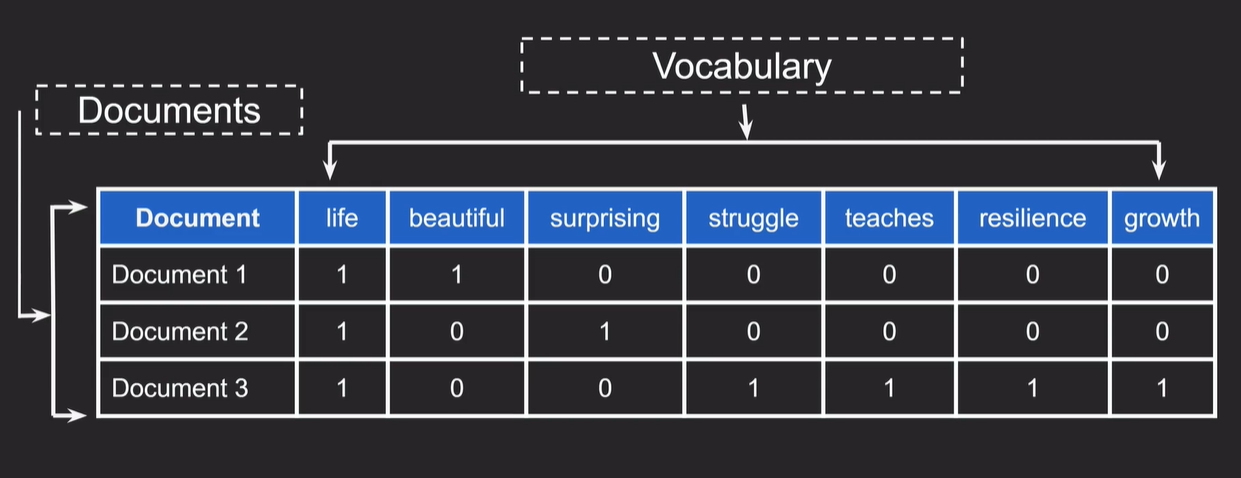

In [67]:
## import library from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
# convert lemmatized docs back into string format for vectorization - list and concat words
documents = [" ".join(doc) for doc in spacy_lemma_docs]

## One-hot encoding
* The `CountVectorizer()` with binary set to True creates one-hot-encoding.

In [99]:
# create variable and apply CountVectorizer
vectorizer_ohe = CountVectorizer(vocabulary=vocabulary, binary=True) # records if word is present or not

In [100]:
## fit and transform the docs
X = vectorizer_ohe.fit_transform(documents)

# get feature names (vocabulary)
feature_names = vectorizer_ohe.get_feature_names_out()


# display feature names and shape of document-term matrix
print("Feature Names:", feature_names)
print("Document-Term Matrix Shape:", X.shape)


# frequency count of each word in document using CountVectorizer
frequency_counts = X.toarray()
print("Frequency Counts:\n", frequency_counts)

Feature Names: ['CVA' 'Coumadin' 'Denies' 'EKG' 'Holt' 'Monday' 'PND' 'PRESENT' 'Toprol'
 'X' 'abdominal' 'actually' 'african' 'american' 'anyway' 'atrial' 'away'
 'become' 'caffeine' 'chest' 'chill' 'chocolate' 'complaint' 'compliant'
 'couple' 'detect' 'diaphoresis' 'direct' 'dyspnea' 'eat' 'edema'
 'episode' 'evaluation' 'event' 'exam' 'fatigue' 'female' 'fever'
 'fibrillation' 'foot' 'go' 'heart' 'heavy' 'history' 'hour' 'however'
 'hypercholesterolemia' 'hypertension' 'illness' 'intake' 'irregular' 'it'
 'last' 'limit' 'limited' 'management' 'may' 'meal' 'medication' 'minute'
 'obtain' 'occasionally' 'of' 'orthopnea' 'pain' 'past' 'patient'
 'peripheral' 'pleasant' 'presyncope' 'race' 'recent' 'recollect' 'refer'
 'relate' 'resolve' 'rest' 'reveal' 'routine' 'say' 'several' 'severe'
 'she' 'standpoint' 'start' 'state' 'subsequently' 'swell' 'symptom'
 'syncope' 'take' 'the' 'they' 'tired' 'today' 'walk' 'well' 'without'
 'year']
Document-Term Matrix Shape: (3, 99)
Frequency Counts

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [101]:
## make dataframe
df = pd.DataFrame(X.toarray(), columns=[feature_names])
df.head()

,CVA,Coumadin,Denies,EKG,Holt,Monday,PND,PRESENT,Toprol,X,...,syncope,take,the,they,tired,today,walk,well,without,year
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Observations
* Not all words are present in all 3 documents.

## Count Vectorization
* Words are represented as a matrix of tokens.
* Counts number of times a word appears in a document, that's it.

In [102]:
## init CountVectorizer
count_vectorizer = CountVectorizer(vocabulary=vocabulary) ## difference is no `binary` parameter

In [103]:
## fit and transform documents
X_cv = count_vectorizer.fit_transform(documents)

# get feature names/vocabulary
feature_names_cv = count_vectorizer.get_feature_names_out()

# display feature names and shape of document-term matrix
print("Feature Names:", feature_names_cv)
print("Document-Term Matrix Shape:", X_cv.shape)

# To see freq count of each word in document
freq_counts_cv = X_cv.toarray()
print("The Frequency counts:\n", freq_counts_cv)

Feature Names: ['CVA' 'Coumadin' 'Denies' 'EKG' 'Holt' 'Monday' 'PND' 'PRESENT' 'Toprol'
 'X' 'abdominal' 'actually' 'african' 'american' 'anyway' 'atrial' 'away'
 'become' 'caffeine' 'chest' 'chill' 'chocolate' 'complaint' 'compliant'
 'couple' 'detect' 'diaphoresis' 'direct' 'dyspnea' 'eat' 'edema'
 'episode' 'evaluation' 'event' 'exam' 'fatigue' 'female' 'fever'
 'fibrillation' 'foot' 'go' 'heart' 'heavy' 'history' 'hour' 'however'
 'hypercholesterolemia' 'hypertension' 'illness' 'intake' 'irregular' 'it'
 'last' 'limit' 'limited' 'management' 'may' 'meal' 'medication' 'minute'
 'obtain' 'occasionally' 'of' 'orthopnea' 'pain' 'past' 'patient'
 'peripheral' 'pleasant' 'presyncope' 'race' 'recent' 'recollect' 'refer'
 'relate' 'resolve' 'rest' 'reveal' 'routine' 'say' 'several' 'severe'
 'she' 'standpoint' 'start' 'state' 'subsequently' 'swell' 'symptom'
 'syncope' 'take' 'the' 'they' 'tired' 'today' 'walk' 'well' 'without'
 'year']
Document-Term Matrix Shape: (3, 99)
The Frequency co

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [104]:
## create a df
df2 = pd.DataFrame(X_cv.toarray(), columns=[feature_names_cv])

In [105]:
# df2
df2.head()

,CVA,Coumadin,Denies,EKG,Holt,Monday,PND,PRESENT,Toprol,X,...,syncope,take,the,they,tired,today,walk,well,without,year
0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,1,1,1,1,1,4
1,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,1,1,1,1,1,4
2,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,1,1,1,1,1,4


## Observations
* The main difference is with one-hot encoding it tells you if a word is present or not, whereas CountVectorizer counts the number of times a word appears in the documents or corpus.